# A Case Study of TOI-1858

[exofop link](https://exofop.ipac.caltech.edu/tess/target.php?id=424733642)

In [3]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lightkurve import search_targetpixelfile

%matplotlib inline

In [4]:
# TIC 424733642 -- TOI-1858
tpf = search_targetpixelfile("TIC 424733642").download_all()

In [14]:
[t.meta['SECTOR'] for t in tpf]

[50, 23, 50]

In [48]:
tpf[2].interact(notebook_url='localhost:8889')

<Axes: title={'center': 'Target ID: 424733642, Cadence: 207156'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

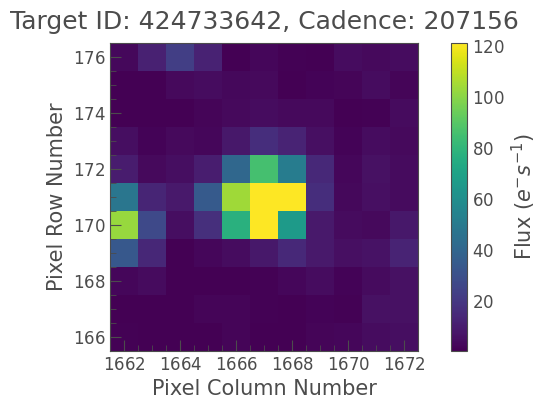

In [79]:
t0 = tpf[0]
t1 = tpf[1]
t2 = tpf[2]
t2.plot(frame=110)

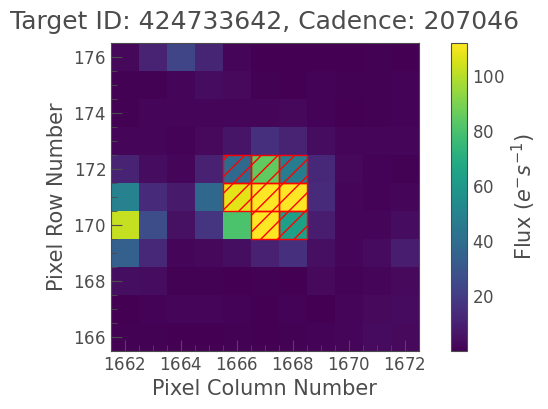

In [80]:
t2.plot(aperture_mask=t.pipeline_mask);

In [81]:
lc0 = t0.to_lightcurve(aperture_mask='pipeline');
lc1 = t1.to_lightcurve(aperture_mask='pipeline');
lc2 = t2.to_lightcurve(aperture_mask='pipeline');

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

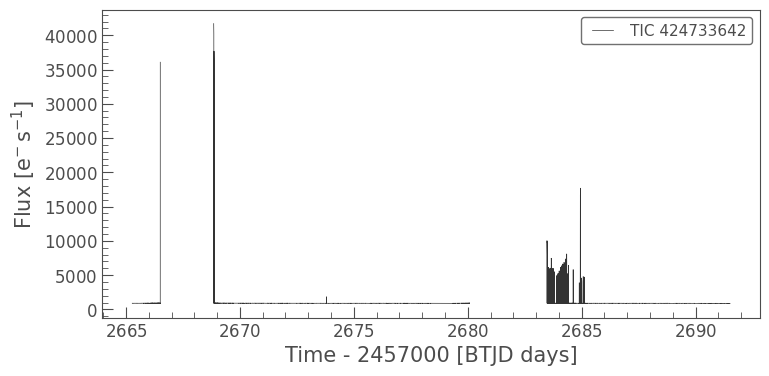

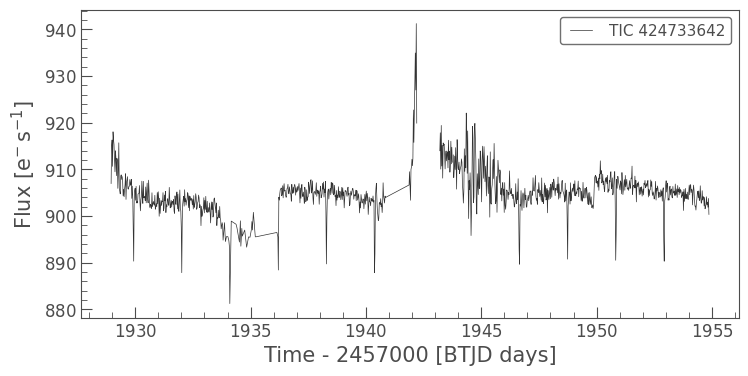

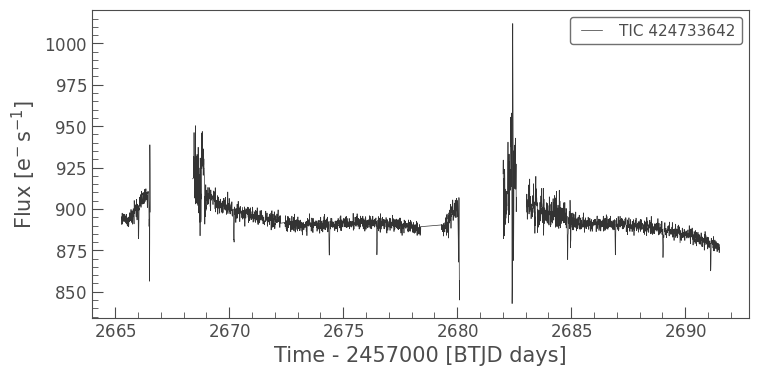

In [82]:
# There are 3 sectors, but the first sector(50) does not seem to have good data.
lc0.plot() # bad data
lc1.plot()
lc2.plot()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

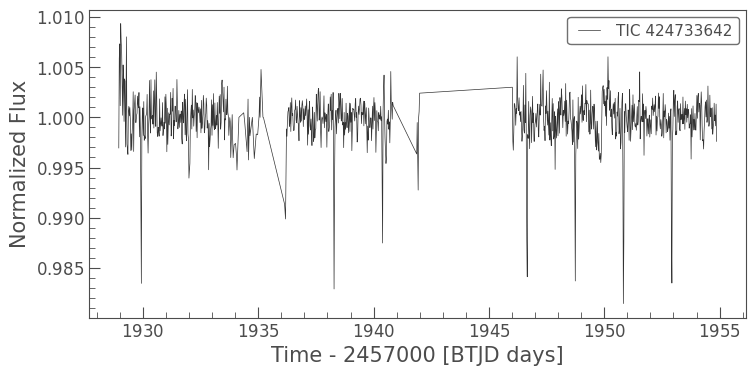

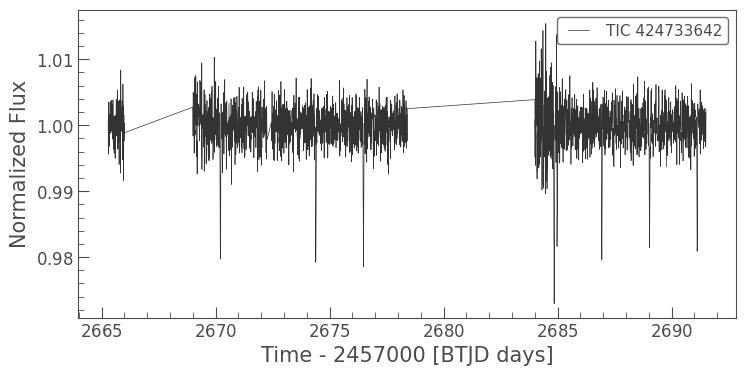

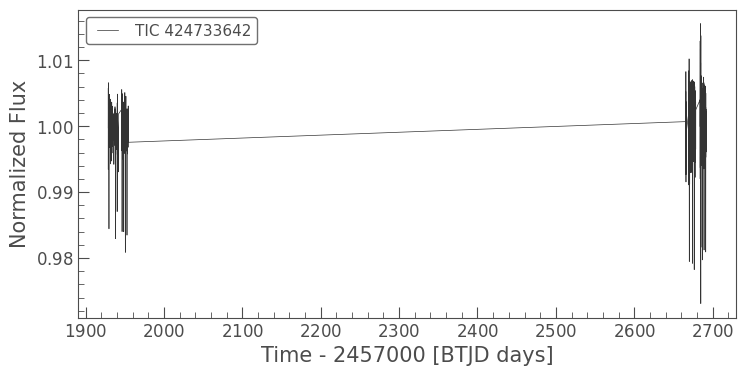

In [85]:
mask1 = (lc1.time.value<1942) | (lc1.time.value > 1946)
lc1_clean = lc1[mask1]
lc1_clean = lc1_clean.remove_outliers(sigma=5)
lc1_clean = lc1_clean.normalize()
lc1_clean = lc1_clean.flatten()
lc1_clean.plot()

mask2 = (lc2.time.value<2666) | ((lc2.time.value > 2669) & (lc2.time.value < 2679)) | (lc2.time.value >2684)
lc2_clean = lc2[mask2]
lc2_clean = lc2_clean.remove_outliers(sigma=5)
lc2_clean = lc2_clean.normalize()
lc2_clean = lc2_clean.flatten()
lc2_clean.plot()

lc_combined_clean = lc1_clean.append(lc2_clean)
lc_combined_clean = lc_combined_clean.flatten()
lc_combined_clean.plot()

Text(2.2, 1e-06, 'TRANSIT_PERIOD=2.0912089')

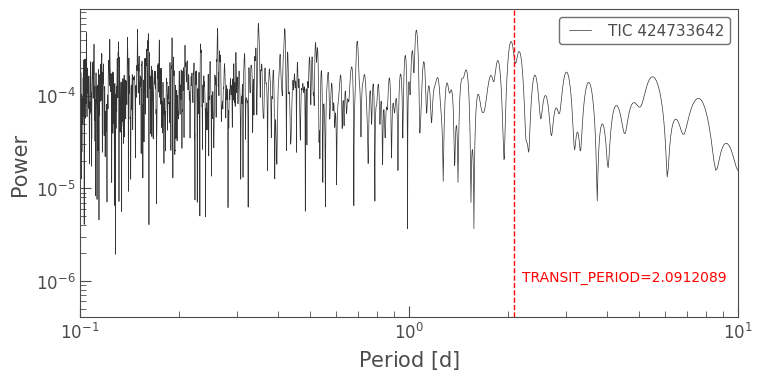

In [86]:
# Published transit period
TRANSIT_PERIOD = 2.0912089

pg = lc_combined_clean.to_periodogram(oversample_factor=1)
pg.plot(view='period', scale='log')
plt.xlim(0.1, 10)
plt.axvline(x=TRANSIT_PERIOD, color='red', linestyle='--', linewidth=1)
plt.text(x=2.2, y=10e-7, s='TRANSIT_PERIOD=2.0912089', fontsize=10, color='red')


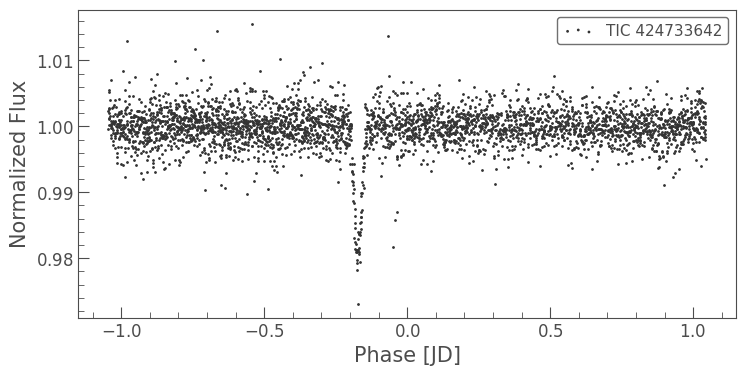

In [87]:
# Plot the folded curve.
lc_combined_clean.normalize().fold(period=TRANSIT_PERIOD, epoch_phase=1939.5).scatter();